In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics 8.3.23  Python-3.10.11 torch-2.5.0+cpu CPU (12th Gen Intel Core(TM) i7-12650H)
Setup complete  (16 CPUs, 15.7 GB RAM, 358.3/476.1 GB disk)


In [3]:
import albumentations as A
import numpy as np
import cv2
from PIL import Image
from pathlib import Path
from tqdm import tqdm
import yaml
import os
import random
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#!pip install ultralytics
#from ultralytics.utils import metrics
import os
from PIL import Image

In [4]:
def load_data(directory):
    images = []
    labels = []
    for class_name in os.listdir(directory):
        images_path = os.path.join(directory, class_name, 'images')
        labels_path = os.path.join(directory, class_name, 'labels')
        
        for image in os.listdir(images_path):
            img = cv2.imread(os.path.join(images_path, image))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            label_file = image.replace('.jpg','.txt')
            label_file_path = os.path.join(labels_path, label_file)
            
            if os.path.exists(label_file_path):
                with open(label_file_path, 'r') as file:
                    label_data = file.readline().strip().split()
                    if len(label_data) > 0:
                        images.append(img)
                        labels.append(label_data)
                    else:
                        print(f"Label file {label_file_path} is empty, skipping this image")
            else:
                print(f"Label file {label_file_path} not found, skipping this image.")
    return images, labels

train_path = 'Train'
val_path = 'Val'

train_images, train_labels = load_data(train_path)
val_images, val_labels = load_data(val_path)




Label file Val\Glioma\labels\gg (342).txt is empty, skipping this image
Label file Val\No Tumor\labels\image(55).txt not found, skipping this image.
Label file Val\No Tumor\labels\image(61).txt not found, skipping this image.



0: 640x640 1 frisbee, 1 bowl, 485.8ms
Speed: 42.9ms preprocess, 485.8ms inference, 32.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 347.3ms
Speed: 11.0ms preprocess, 347.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 vase, 310.8ms
Speed: 13.0ms preprocess, 310.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


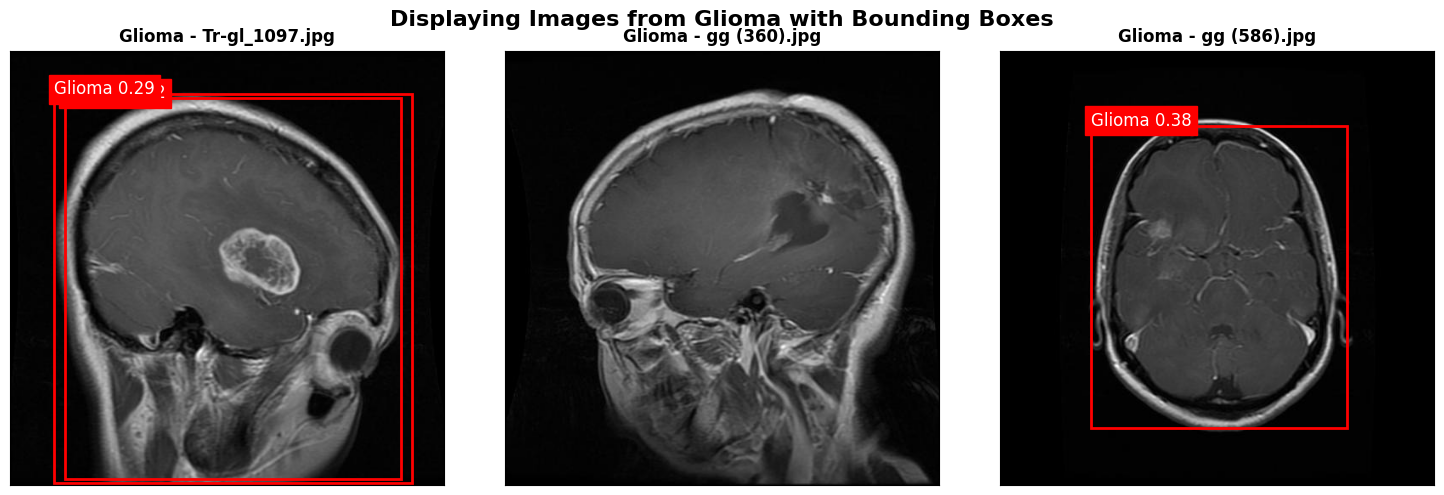


0: 640x640 1 person, 316.2ms
Speed: 11.1ms preprocess, 316.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 dog, 244.4ms
Speed: 22.0ms preprocess, 244.4ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 415.9ms
Speed: 10.3ms preprocess, 415.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


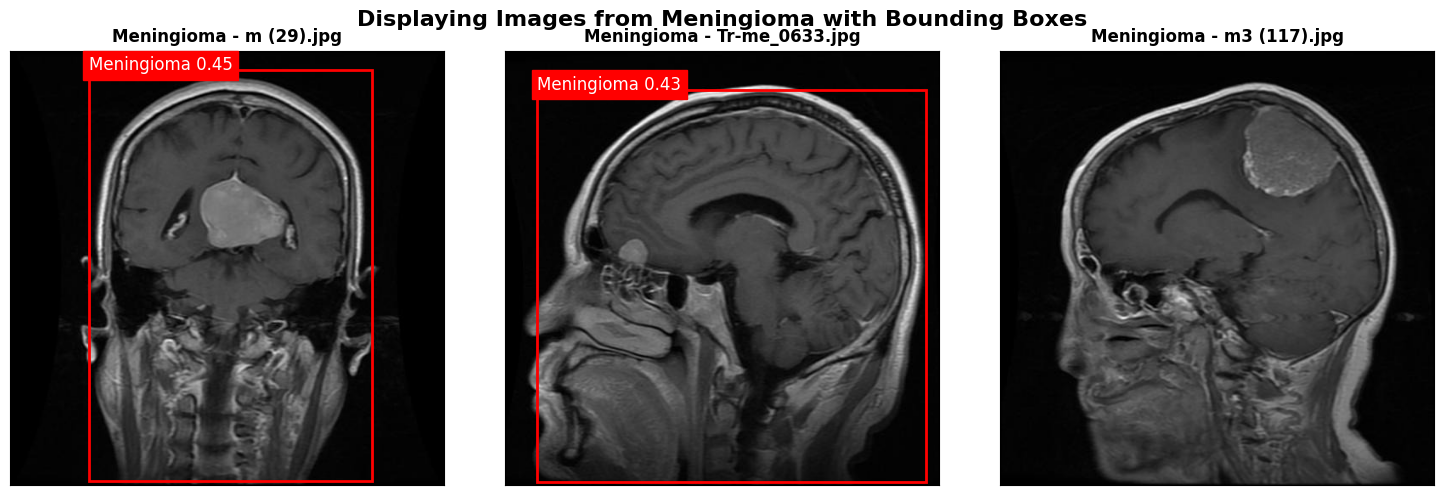


0: 640x640 (no detections), 299.2ms
Speed: 8.5ms preprocess, 299.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 387.9ms
Speed: 12.0ms preprocess, 387.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 vase, 329.2ms
Speed: 15.3ms preprocess, 329.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


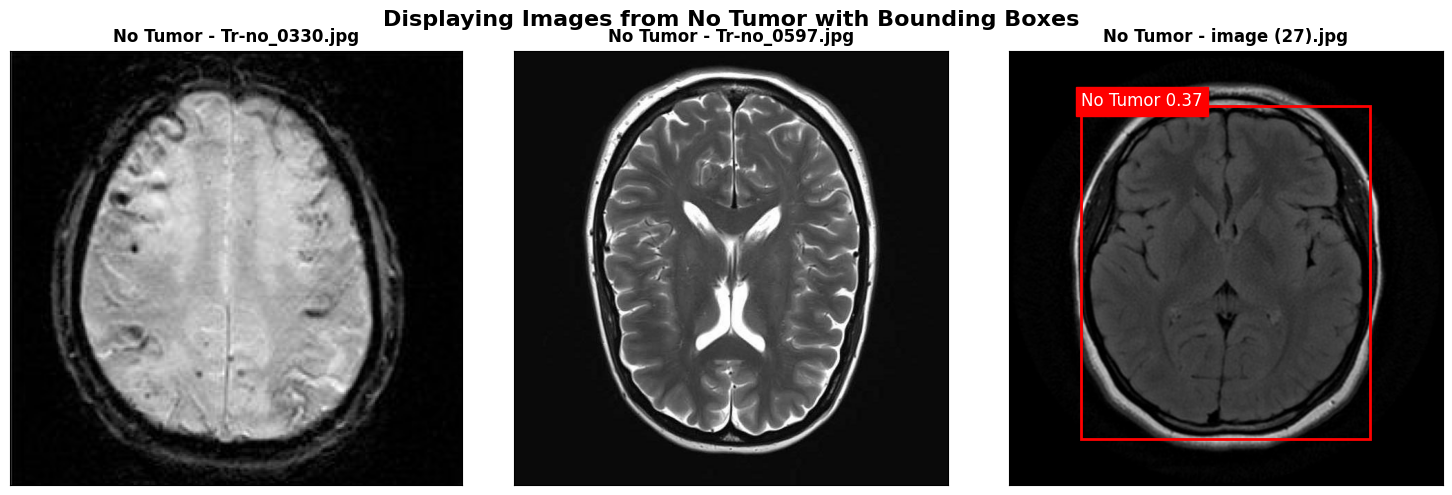


0: 640x640 1 clock, 251.5ms
Speed: 3.9ms preprocess, 251.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 265.3ms
Speed: 5.0ms preprocess, 265.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 bowl, 283.2ms
Speed: 5.5ms preprocess, 283.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


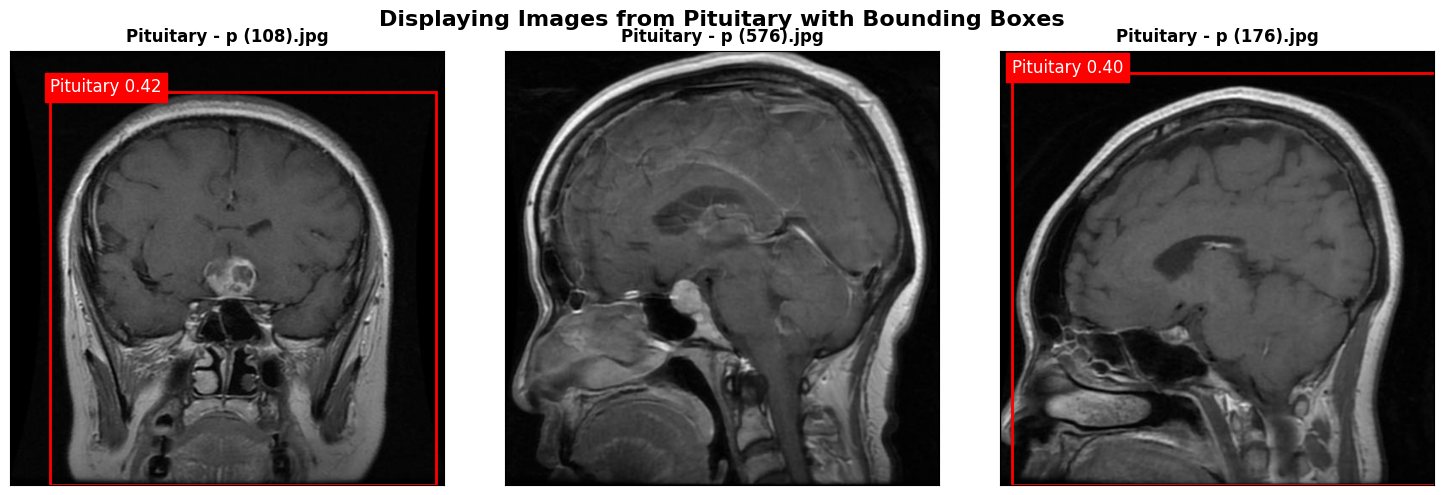

In [ ]:
import random
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from ultralytics import YOLO  # Make sure YOLO is correctly imported

# Load the YOLO model
model = YOLO('C:/Users/PHOENIX/Desktop/my project 1/yolov8n.pt')  

def display_random_images_with_boxes(directory, num_images=3):
    # Iterate through each class folder in the given directory
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        images_path = os.path.join(class_path, 'images')
        
        # Get a list of images in the class folder and select random samples
        images = os.listdir(images_path)
        selected_images = random.sample(images, min(num_images, len(images)))  # Ensure we don't exceed available images
        
        # Create a plot with one row and multiple columns based on the number of images
        fig, axes = plt.subplots(1, len(selected_images), figsize=(15, 5))
        
        # Set the title for the figure
        fig.suptitle(f"Displaying Images from {class_name} with Bounding Boxes", fontsize=16, fontweight='bold')
        
        # Display each selected image with bounding boxes
        for ax, image in zip(axes, selected_images):
            image_path = os.path.join(images_path, image)
            img = mpimg.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Run the model to get predictions
            results = model.predict(img)[0]

            # Display the image
            ax.imshow(img)
            ax.set_title(f"{class_name} - {os.path.basename(image)}", fontweight='bold')
            ax.set_xticks([])
            ax.set_yticks([])

            # Draw bounding boxes for each detected object
            for detection in results.boxes:
                x1, y1, x2, y2 = detection.xyxy[0].cpu().numpy()
                conf = detection.conf[0].cpu().numpy()
                cls = detection.cls[0].cpu().numpy()
                
                # Draw the bounding box
                rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
                
                # Add label with confidence score
                ax.text(x1, y1, f"{class_name} {conf:.2f}", color='white', fontsize=12, backgroundcolor='red')
        
        plt.tight_layout()
        plt.show()

# Call the function with the correct path
display_random_images_with_boxes(r'C:\Users\PHOENIX\Desktop\my project 1\Train')


In [6]:
def images_preprocessing(images):
    processed_images = []
    for img in images:
        img_resized = cv2.resize(img, (640,640))
        processed_images.append(img_resized)
        
    return np.array(processed_images)

train_images = images_preprocessing(train_images)
val_images = images_preprocessing(val_images)

In [13]:
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser'


def count_images_in_folders(base_path):
    image_counts = []
    
    # Ensure the base path exists
    if not os.path.exists(base_path):
        print("The specified base path does not exist.")
        return
    
    # Get all directories in the base_path
    main_directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    
    for main_dir in main_directories:
        images_dir_path = os.path.join(base_path, main_dir, 'images')
        
        if os.path.exists(images_dir_path):
            # List files in the 'images' folder
            images = [f for f in os.listdir(images_dir_path) if os.path.isfile(os.path.join(images_dir_path, f))]
            
            # Print image count for each class
            print(f'\033[1mNumber of Images in {main_dir}: {len(images)}\033[0m')
            image_counts.append({'Class': main_dir, 'Count': len(images)})
        else:
            print(f'No "images" folder found in {main_dir}.')
    
    # Create a DataFrame for visualization
    if image_counts:
        df = pd.DataFrame(image_counts).sort_values(by='Count', ascending=False)

        # Dynamic color assignment
        num_classes = len(df['Class'])
        colors = ['#a6a832', '#32a0a8', '#599173', '#bfbf95']  # Add more colors if needed

        # Plotting the Pie Chart
        fig = go.Figure(data=[go.Pie(
            labels=df['Class'], 
            values=df['Count'], 
            pull=[0.1 if i == 0 else 0 for i in range(num_classes)],
            textinfo='label+percent',
            marker=dict(colors=colors[:num_classes], line=dict(color='black', width=2))
        )])

        # Layout customization
        fig.update_layout(
            paper_bgcolor='#dff2ef', 
            plot_bgcolor='#dff2ef', 
            title='Number of Images in Each Class',
            width=650, 
            height=600, 
            title_x=0.5,
            title_font=dict(family="Times New Roman", color="#191e1f", size=30),
            font=dict(family="Times New Roman", size=15)
        )
        fig.show()
    else:
        print("No images found in any folder.")
    
    return

# Define the base path (use a raw string for Windows paths)
base_path = r'C:\Users\PHOENIX\Desktop\my project 1\Train'
count_images_in_folders(base_path)


Number of Images in Glioma: 1153
Number of Images in Meningioma: 1449
Number of Images in No Tumor: 711
Number of Images in Pituitary: 1424


Number of Labels in Glioma : 1153
Number of Labels in Meningioma : 1449
Number of Labels in No Tumor : 711
Number of Labels in Pituitary : 1424


C:\Users\PHOENIX\AppData\Local\Temp\ipykernel_19328\2669585926.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




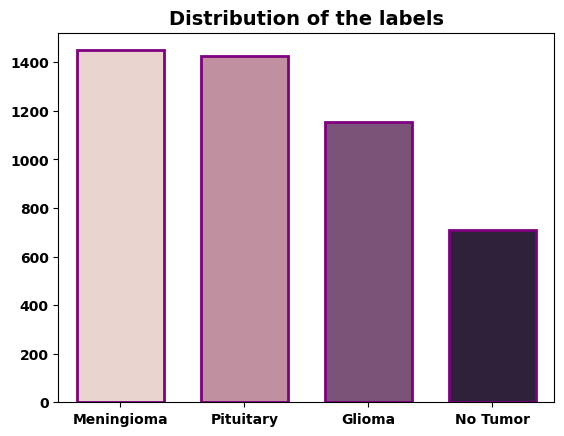

In [16]:
def count_labels_in_folders(base_path):
    label_counts = []
    
    # Get all directories in the base_path
    main_directories = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    
    for main_dir in main_directories:
        label_dir_path = os.path.join(base_path, main_dir, 'labels')
        
        labels = [f for f in os.listdir(label_dir_path) if os.path.isfile(os.path.join(label_dir_path, f))]
        
        print(f'\033[1mNumber of Labels in {main_dir} : {len(labels)}\033[0m')
        label_counts.append({'Class': main_dir, 'Count': len(labels)})
    df1 = pd.DataFrame(label_counts).sort_values(by='Count',ascending=False)
    
    sns.barplot(df1, x='Class', y='Count', width=0.7, edgecolor='purple', linewidth=2, palette=sns.cubehelix_palette(n_colors=len(df1)))
    
    plt.title("Distribution of the labels", weight='bold', fontsize=14)
    plt.xticks(color='black',weight='bold')
    plt.yticks(color='black',weight='bold')
    plt.xlabel('', weight='bold', fontsize=14)
    plt.ylabel('',weight='bold', fontsize=14)
    plt.grid(False)
    
    return 
    
base_path = r'C:\Users\PHOENIX\Desktop\my project 1\Train'

count_labels_in_folders(base_path)

In [1]:
import yaml

# Define dataset metadata with local paths
dataset_yaml = {
    'path': 'C:/Users/PHOENIX/Desktop/my project 1',
    'train': 'Train',
    'val': 'Val',
    'names': ["Glioma", "Meningioma", "No Tumor", "Pituitary"]
}

# Create the YAML file in the specified directory
with open('C:/Users/PHOENIX/Desktop/my project 1/dataset_yaml.yaml', 'w') as file:
    yaml.dump(dataset_yaml, file)


In [1]:
import yaml
from ultralytics import YOLO  # Ensure the library is imported

# Define dataset YAML metadata with local paths
dataset_yaml = {
    'path': 'C:/Users/PHOENIX/Desktop/my project 1',
    'train': 'Train',
    'val': 'Val',
    'names': ["Glioma", "Meningioma", "No Tumor", "Pituitary"]
}

# Create the YAML file in the specified directory
yaml_file_path = 'C:/Users/PHOENIX/Desktop/my project 1/dataset_yaml.yaml'
with open(yaml_file_path, 'w') as file:
    yaml.dump(dataset_yaml, file)

# Load YOLO model using the local pretrained weights
model = YOLO('C:/Users/PHOENIX/Desktop/my project 1/yolov8n.pt')

# Train the model using the dataset configuration YAML file
train_results = model.train(data=yaml_file_path, epochs=5, imgsz=640)

# Optional: Display training results
print(train_results)


100%|██████████| 6.25M/6.25M [01:32<00:00, 71.1kB/s]


New https://pypi.org/project/ultralytics/8.3.25 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.23  Python-3.10.11 torch-2.5.0+cpu CPU (12th Gen Intel Core(TM) i7-12650H)
engine\trainer: task=detect, mode=train, model=C:/Users/PHOENIX/Desktop/my project 1/yolov8n.pt, data=C:/Users/PHOENIX/Desktop/my project 1/dataset_yaml.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

100%|██████████| 755k/755k [00:07<00:00, 99.9kB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 225 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning C:\Users\PHOENIX\Desktop\my project 1\Train\Glioma\labels... 4737 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4737/4737 [00:04<00:00, 974.23it/s] 


train: New cache created: C:\Users\PHOENIX\Desktop\my project 1\Train\Glioma\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\PHOENIX\Desktop\my project 1\Val\Glioma\labels... 510 images, 3 backgrounds, 0 corrupt: 100%|██████████| 512/512 [00:00<00:00, 889.66it/s]


val: New cache created: C:\Users\PHOENIX\Desktop\my project 1\Val\Glioma\labels.cache
Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.022      2.405      1.212          3        640: 100%|██████████| 297/297 [17:50<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:41<00:00,  2.59s/it]

                   all        512        554      0.846      0.689       0.81      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.025      1.368      1.201          1        640: 100%|██████████| 297/297 [17:24<00:00,  3.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:34<00:00,  2.17s/it]

                   all        512        554      0.835      0.724      0.841      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.005      1.098      1.185          1        640: 100%|██████████| 297/297 [15:23<00:00,  3.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:33<00:00,  2.11s/it]

                   all        512        554      0.893      0.852      0.909      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.9471     0.9009      1.157          3        640: 100%|██████████| 297/297 [14:37<00:00,  2.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:34<00:00,  2.16s/it]

                   all        512        554       0.87      0.857       0.92      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G       0.88     0.7566       1.12          3        640: 100%|██████████| 297/297 [15:12<00:00,  3.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:39<00:00,  2.49s/it]

                   all        512        554       0.91      0.905      0.944       0.72



5 epochs completed in 1.393 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.23  Python-3.10.11 torch-2.5.0+cpu CPU (12th Gen Intel Core(TM) i7-12650H)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:35<00:00,  2.22s/it]


                   all        512        554       0.91      0.905      0.944       0.72
                Glioma        135        153      0.877      0.804      0.883      0.672
            Meningioma        140        142      0.942      0.972      0.987      0.775
              No Tumor         98         98      0.921      0.956      0.965      0.721
             Pituitary        154        161      0.899      0.888      0.942      0.714
Speed: 1.0ms preprocess, 60.6ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\train
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002380A40EDD0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.00500

In [6]:
from PIL import Image
import os

# Assuming you have a directory for validation images
val_dir = r'C:\Users\PHOENIX\Desktop\my project 1\Val'
val_images = [Image.open(os.path.join(val_dir, img)) for img in os.listdir(val_dir) if img.endswith('.jpg')]


In [14]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# Define class names
classes = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

val_dir = r'C:\Users\PHOENIX\Desktop\my project 1\Val'
val_images = [Image.open(os.path.join(val_dir, img)) for img in os.listdir(val_dir) if img.endswith('.jpg')]

# Function to display detection results with highlighted parts
def display_samples(images, model):
    fig, axes = plt.subplots(5, 2, figsize=(15, 20))
    fig.suptitle('YOLOv8 Detection')
    axes = axes.flatten()

    # Ensure sample size does not exceed the number of available images
    sample_size = min(len(images), 10)
    selected_images = random.sample(images, sample_size)
    
    for i, img in enumerate(selected_images):
        result = model.predict(img)[0]  
        ax = axes[i]
        ax.imshow(img)

        for detection in result.boxes:
            x1, y1, x2, y2 = detection.xyxy[0].cpu().numpy()
            conf = detection.conf[0].cpu().numpy()
            cls = detection.cls[0].cpu().numpy()
            rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1, f"{classes[int(cls)]} {conf:.2f}", color='white', fontsize=12, backgroundcolor='red')
    plt.tight_layout()

# Call the function
display_samples(val_images, model)


In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the results directory (adjust the path based on your setup)
results_dir = 'Train'

# List all images in the directory
result_images = [img for img in os.listdir(results_dir) if img.endswith('.jpg') or img.endswith('.png')]

# Display the images
for img_name in result_images:
    img_path = os.path.join(results_dir, img_name)
    img = Image.open(img_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step


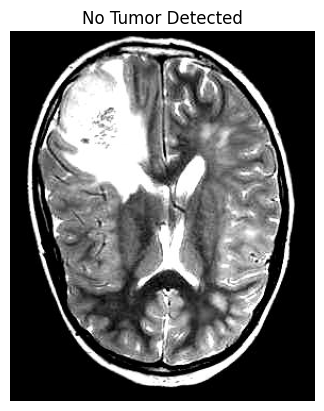

In [12]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Define function to preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocess the image for model prediction in grayscale format.
    
    Parameters:
    - image_path: str, path to the image file
    - target_size: tuple, size to resize the image (224x224 in this case)
    
    Returns:
    - Preprocessed grayscale image as a numpy array
    """
    # Load the image in grayscale format
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Resize the image to match the model's expected input shape
    resized_image = cv2.resize(image, target_size)
    
    # Normalize the image data to the range (0, 1)
    resized_image = resized_image / 255.0
    
    # Expand dimensions to match the model input shape (1, 224, 224, 1)
    resized_image = np.expand_dims(resized_image, axis=(0, -1))
    
    return resized_image, image  # Return the original grayscale image for visualization

# Define function to predict if the image has a brain tumor and plot the result with bounding boxes
def predict_and_plot(image_path):
    """
    Predicts if the given image has a brain tumor and plots the result with bounding boxes if detected.
    
    Parameters:
    - image_path: str, path to the image file
    """
    # Preprocess the image
    preprocessed_image, original_image = preprocess_image(image_path)
    
    # Get model predictions
    prediction = model.predict(preprocessed_image)
    
    # Convert prediction to binary outcome
    if prediction[0][0] >= 0.5:  # Assuming threshold of 0.5
        tumor_detected = True
        result_text = "Tumor Detected"
    else:
        tumor_detected = False
        result_text = "No Tumor Detected"
    
    # Display the result with bounding boxes if a tumor is detected
    fig, ax = plt.subplots(1)
    ax.imshow(original_image, cmap='gray')
    ax.set_title(result_text)
    
    if tumor_detected:
        # Assuming `best_model.keras` outputs bounding box coordinates as well
        # Replace the below with actual bounding box data if available
        
        bounding_boxes = [[50, 50, 150, 150, 0.85]]  # Placeholder bounding box
        
        # Draw bounding boxes on the image
        for box in bounding_boxes:
            x_min, y_min, x_max, y_max, confidence = box
            width, height = x_max - x_min, y_max - y_min
            
            # Draw the bounding box
            rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            
            # Add confidence label
            ax.text(x_min, y_min - 10, f"Tumor {confidence:.2f}", color='red', fontsize=12, backgroundcolor='white')
    
    plt.axis('off')
    plt.show()

# Test the function
image_path = r"C:\Users\PHOENIX\Desktop\InsightScan\datasets\yes\y0.jpg"

predict_and_plot(image_path)
